In [63]:
import numpy as np
import pandas as pd
from backroom import *
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Structure the dataset
for cv_split in range(1,6):
    datasets = []
    train_df = pd.read_csv(f"../../data/interim/train_df_2_fold_{cv_split}.csv", index_col="id")
    val_df = pd.read_csv(f"../../data/interim/val_df_2_fold_{cv_split}.csv", index_col="id")
    test_df = pd.read_csv("../../data/interim/test_df_2.csv", index_col="id")
    datasets = [train_df, val_df, test_df]
    break

lr = LinearRegression()
features = ['PULocationID', 'DOLocationID', 'pickup_day_of_week', 'VendorID', 'passenger_count', 'payment_type_1', 'hour', 'closest_hour']
lr.fit(train_df[features], train_df['duration_seconds'])
preds = lr.predict(val_df[features])
# Baseline model
print(np.sqrt(mean_squared_error([train_df['duration_seconds'].mean()]*val_df.shape[0], val_df['duration_seconds'])))

# First model (Only 5 seconds better than the baseline model; need to add the useful features )
print(np.sqrt(mean_squared_error(preds, val_df['duration_seconds'])))

680.7867243432906
675.098583237595


In [70]:
lr.coef_

array([ -0.59220799,  -0.65901996,  -7.63833097, -18.93996021,
        10.9034621 ,  54.91564112,   0.59451646,   4.77548193])

In [69]:
features

['PULocationID',
 'DOLocationID',
 'pickup_day_of_week',
 'VendorID',
 'passenger_count',
 'payment_type_1',
 'hour',
 'closest_hour']

(array([  32.,   18.,   36.,   55.,   80.,  180.,  356.,  765., 1437.,
         589.]),
 array([-3269.56752469, -2846.51757886, -2423.46763304, -2000.41768721,
        -1577.36774138, -1154.31779555,  -731.26784973,  -308.2179039 ,
          114.83204193,   537.88198776,   960.93193358]),
 <BarContainer object of 10 artists>)

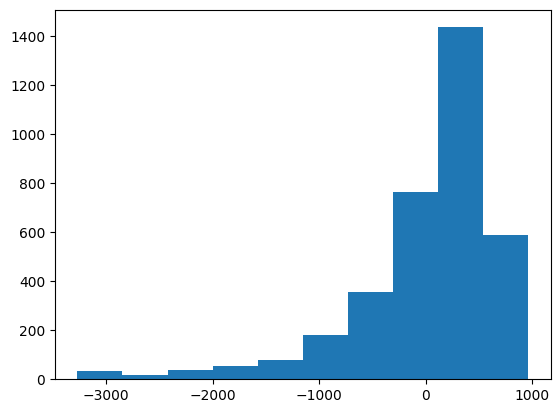

In [65]:
plt.hist(preds - val_df['duration_seconds'])

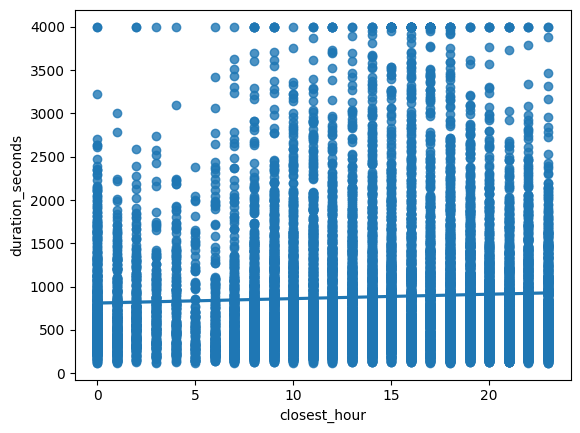

In [71]:
sns.regplot(x="closest_hour", y="duration_seconds", data=train_df);